# Employee data data


## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import xgboost
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## 2. Exploratory Data Analysis
Loading the dataset via Pandas packages into a dataframe object and have a quick look at a few rows

In [2]:
data = pd.read_excel('EmployeeAttritionData.xlsx')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Data Quality Check

In [3]:
def quick_analysis(data):
    print("data Types:")
    print(data.dtypes)
    print("\nRows and Columns:")
    print(data.shape)
    print("\nColumn names:")
    print(data.columns)
    print("\nNull Values")
    print(data.apply(lambda x: sum(x.isnull()) / len(data)))
    print("\nUnique values")
    print(data.nunique())

quick_analysis(data)

data Types:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWor

In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.0,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.0,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,36.863780,797.135433,9.135433,2.925197,1.0,1143.535433,2.712598,65.873228,2.727559,2.060630,2.714173,6480.437008,14264.179528,2.691339,15.151969,3.149606,2.688976,80.0,0.798425,11.220472,2.805512,2.766142,6.914173,4.178740,2.154331,4.067717
std,9.057275,403.115079,8.045120,1.029086,0.0,561.172683,1.104507,20.293834,0.717745,1.094557,1.102774,4649.575392,7129.360451,2.497754,3.634793,0.356826,1.076340,0.0,0.856255,7.770155,1.279332,0.698723,5.940581,3.565046,3.198915,3.550178
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,458.250000,2.000000,2.000000,1.0,707.500000,2.000000,48.000000,2.000000,1.000000,2.000000,2936.000000,8003.750000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,792.500000,7.000000,3.000000,1.0,1163.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4945.500000,14220.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1153.000000,13.000000,4.000000,1.0,1622.750000,4.000000,83.000000,3.000000,3.000000,4.000000,8260.250000,20428.250000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,36.000000,17.000000,15.000000,17.000000


# 3. Correlation 
> We need to check if there are some indepandent variables which are highly correlated. For creating better model we need to reduce collinearity between indepandent variables.
Why to remove collinearity between the indepandent variables?
when variables are highly correlated change in one variable would cause change in another variable so the model results fluctuate. Even a small change in the data can results a varied change in the model results.

>How to check if the there is collinearity between the indepandent variables?
>1) By Correlation Matrix
>2) By Variance inflation factor


>I am using the correlation matrix to identify the collinearity

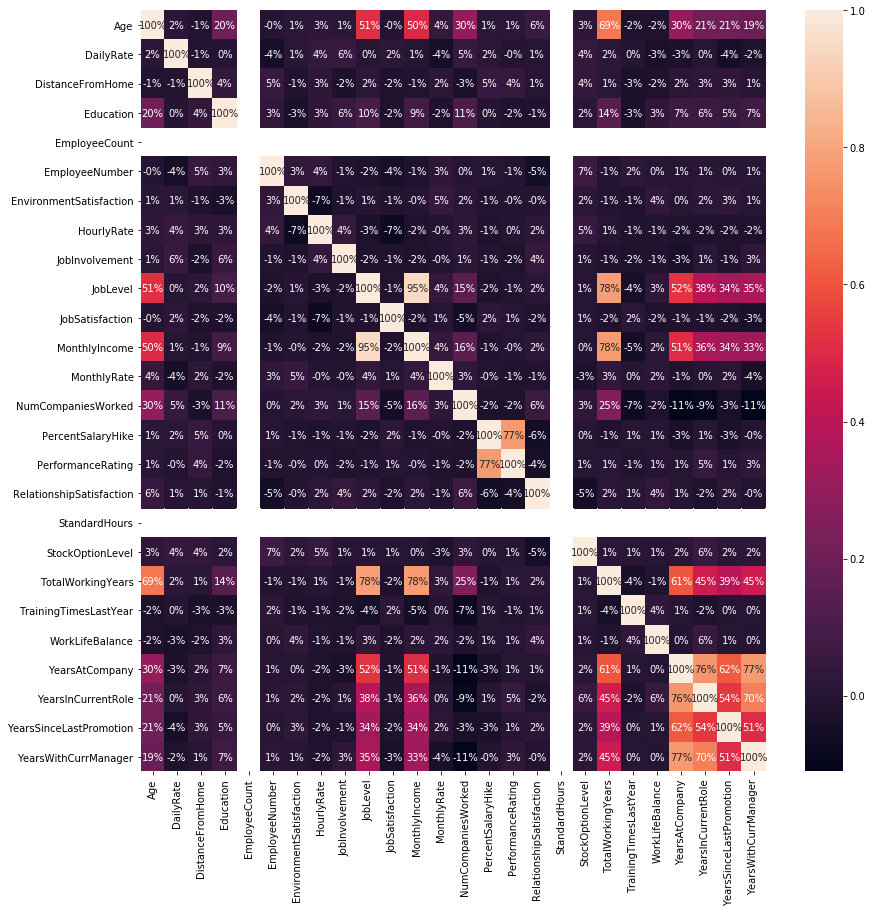

In [5]:
#Visualize the correlation
corr = data.drop(['Attrition'], axis=1).corr()
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, fmt = '.0%')
plt.show()

> Next the removal of independent variables that have multi collinearity. 
>
> Age is highly correlated with MonthlyIncome, JobLevel, MonthlyIncomeByAge, Education, etc

In [6]:
data['Attrition'] = data['Attrition'].apply(lambda row: 1 if row=='Yes' else 0)
data['Attrition'].value_counts()

0    1066
1     204
Name: Attrition, dtype: int64

In [7]:
def groupDistanceFromHome(data):
    if int(data) >=1 and int(data) <= 5:
        return 'NearBy'
    elif int(data) >=6 and int(data) <= 15:
        return 'MidDistance'
    else:
        return 'Far'

def groupYearsInCurrentRole(data):
    if int(data) >=0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'
    
def groupYearsWithCurrManager(data):
    if int(data) >=0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'
    
def groupYearsSinceLastPromotion(data):
    if int(data) >=0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'

def groupYearsAtCompany(data):
    if int(data) >=0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'
    
def groupTotalWorkingYears(data):
    if int(data) >=0 and int(data) <= 8:
        return 'short'
    elif int(data) >8 and int(data) <= 15:
        return 'medium'
    else:
        return 'long'
def groupPercentSalaryHike_by_rating(data):
    if int(data) == 3:
        return 'good'
    elif int(data) == 4:
        return 'better'
    else:
        return 'best'

def groupAverageWorkingYearInEachComp(data):
    if int(data) >= 0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'

def getAvgWorkingYearInEachComp(TotalWorkingYears, NumCompaniesWorked):
    if NumCompaniesWorked == 0:
        return TotalWorkingYears
    else:
        return TotalWorkingYears / NumCompaniesWorked

In [8]:
data['AverageWorkingYearInEachComp'] = data[['TotalWorkingYears', 'NumCompaniesWorked']].apply(lambda row: 
                                        getAvgWorkingYearInEachComp(row.TotalWorkingYears, row.NumCompaniesWorked), axis=1)
data['AverageWorkingYearInEachComp'] = data['AverageWorkingYearInEachComp'].astype(int)
data['AverageWorkingYearInEachComp'] = data['AverageWorkingYearInEachComp'].apply(lambda row:
                                        groupAverageWorkingYearInEachComp(row))
data['DistanceFromHome'] = data['DistanceFromHome'].apply(lambda row: groupDistanceFromHome(row))
data['YearsInCurrentRole'] = data['YearsInCurrentRole'].apply(lambda row: groupYearsInCurrentRole(row))
data['YearsWithCurrManager'] = data['YearsWithCurrManager'].apply(lambda row: groupYearsWithCurrManager(row))
data['YearsSinceLastPromotion'] = data['YearsSinceLastPromotion'].apply(lambda row: groupYearsSinceLastPromotion(row))
data['YearsAtCompany'] = data['YearsAtCompany'].apply(lambda row: groupYearsAtCompany(row))
data['TotalWorkingYears'] = data['TotalWorkingYears'].apply(lambda row: groupTotalWorkingYears(row))

In [9]:
data['MontlyIncomeByAge'] = data['MonthlyIncome'] / data['Age']
data['MontlyIncomeByAge'] = data['MontlyIncomeByAge'].astype(int)

In [10]:
#Dropping the unwanted columns: Those having only one unique value.
data=data.drop(["EmployeeCount","Over18","StandardHours","EmployeeNumber"],axis=1)

### **Correlation Features**

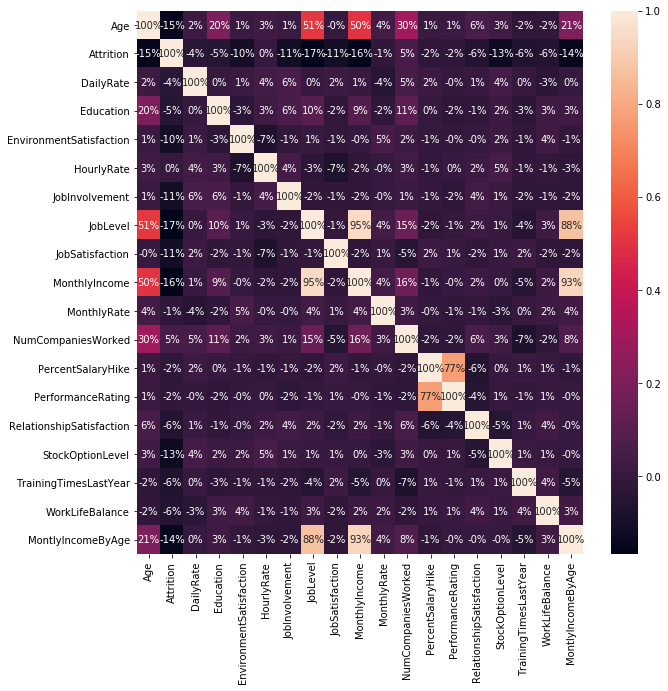

In [11]:
#Visualize the correlation
corr = data.drop(['Attrition'], axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt = '.0%')
plt.show()

##### Getting the categorical columns and numerical columns

In [12]:
cat_columns =[]
for col, value in data.drop(['Attrition'], axis=1).iteritems():
    if value.dtype == 'object':
        cat_columns.append(col)
num_columns = data.drop(['Attrition'], axis=1).columns.difference(cat_columns)

In [13]:
print("categorical columns - %s" %(cat_columns))
print("")
print("numerical columns - %s" %(num_columns))

categorical columns - ['BusinessTravel', 'Department', 'DistanceFromHome', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AverageWorkingYearInEachComp']

numerical columns - Index(['Age', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'MontlyIncomeByAge',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance'],
      dtype='object')


In [14]:
data_data = data['Attrition']
cat_data = data[cat_columns]
num_data = data[num_columns]

##### Creating dummy variables for Categorical variables

In [15]:
cat_data = pd.get_dummies(cat_data)

In [16]:

cat_data.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,DistanceFromHome_Far,DistanceFromHome_MidDistance,DistanceFromHome_NearBy,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,TotalWorkingYears_long,TotalWorkingYears_medium,TotalWorkingYears_short,YearsAtCompany_long,YearsAtCompany_medium,YearsAtCompany_short,YearsInCurrentRole_long,YearsInCurrentRole_medium,YearsInCurrentRole_short,YearsSinceLastPromotion_long,YearsSinceLastPromotion_medium,YearsSinceLastPromotion_short,YearsWithCurrManager_long,YearsWithCurrManager_medium,YearsWithCurrManager_short,AverageWorkingYearInEachComp_long,AverageWorkingYearInEachComp_medium,AverageWorkingYearInEachComp_short
0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
4,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1


now concatenating the dummyvariables columns with numerical data and depandent variables

In [17]:
final_data = pd.concat([cat_data, num_data, data_data], axis=1)
final_data.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,DistanceFromHome_Far,DistanceFromHome_MidDistance,DistanceFromHome_NearBy,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,TotalWorkingYears_long,TotalWorkingYears_medium,TotalWorkingYears_short,YearsAtCompany_long,YearsAtCompany_medium,YearsAtCompany_short,YearsInCurrentRole_long,YearsInCurrentRole_medium,YearsInCurrentRole_short,YearsSinceLastPromotion_long,YearsSinceLastPromotion_medium,YearsSinceLastPromotion_short,YearsWithCurrManager_long,YearsWithCurrManager_medium,YearsWithCurrManager_short,AverageWorkingYearInEachComp_long,AverageWorkingYearInEachComp_medium,AverageWorkingYearInEachComp_short,Age,DailyRate,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,MontlyIncomeByAge,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Attrition
0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,41,1102,2,2,94,3,2,4,5993,19479,146,8,11,3,1,0,0,1,1
1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,49,279,1,3,61,2,2,2,5130,24907,104,1,23,4,4,1,3,3,0
2,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,37,1373,2,4,92,2,1,3,2090,2396,56,6,15,3,2,0,3,3,1
3,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,33,1392,4,4,56,3,1,3,2909,23159,88,1,11,3,3,0,3,3,0
4,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,27,591,1,1,40,3,1,2,3468,16632,128,9,12,3,4,1,3,3,0


>**Converting the data to train and test**
> - using the train size 70% and test size 30%

In [18]:
train_data, test_data = train_test_split(final_data, train_size=0.7, test_size=0.3)

In [19]:
y_train = train_data['Attrition']
X_train = train_data.drop(['Attrition'], axis=1)
y_test = test_data['Attrition']
X_test = test_data.drop(['Attrition'], axis=1)

using the below code snippet i am getting the corr matrix and removing the one of columns for which the absolute value of corr is greater than 0.8

In [20]:
scaler = MinMaxScaler()
X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [21]:
corr_matrix = X_train_transformed.corr()
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.8:
            corr_features.add(corr_matrix.columns[i])
corr_features

{'Department_Sales',
 'Gender_Male',
 'JobRole_Human Resources',
 'JobRole_Sales Executive',
 'MonthlyIncome',
 'MontlyIncomeByAge',
 'OverTime_Yes',
 'YearsSinceLastPromotion_short'}

In [22]:
# removing the columns for from the transformed data for which the value is greater than 0.8
X_train_transformed = X_train_transformed.drop(columns=list(corr_features), axis=1)

>Applying Logistic Regression with Recursive Feature Selection to identify the top 10 features that lead to employee attrition
>
> **RFECV** - 

In [23]:
log_reg = LogisticRegression()
rfe = RFECV(log_reg, cv=StratifiedKFold(5), scoring='neg_mean_squared_error', min_features_to_select=5)
rfe.fit(X_train_transformed, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(), min_features_to_select=5,
      scoring='neg_mean_squared_error')

In [24]:
X_train_transformed = X_train_transformed.drop(X_train_transformed.columns[np.where(rfe.support_ == False)], axis=1)

In [25]:
important_cols = pd.DataFrame()
important_cols['Cols'] = X_train_transformed.columns
important_cols['Percent'] = rfe.estimator_.coef_[0]

In [26]:
important_cols = important_cols.sort_values(by='Percent', ascending=False)
important_cols

,Cols,Percent
1,BusinessTravel_Travel_Frequently,1.049884
12,MaritalStatus_Single,0.764893
31,NumCompaniesWorked,0.753117
22,YearsSinceLastPromotion_medium,0.750977
24,AverageWorkingYearInEachComp_short,0.669189
8,JobRole_Laboratory Technician,0.656858
17,YearsAtCompany_long,0.562085
7,EducationField_Technical Degree,0.524641
16,TotalWorkingYears_short,0.510951
20,YearsInCurrentRole_short,0.455788


In [27]:
### getting only the first 12 featues
X_train_10_imp_feature = X_train_transformed[important_cols['Cols'].values[0:22]]

In [28]:
log_reg.fit(X_train_10_imp_feature, y_train)

LogisticRegression()

In [29]:
X_test_transform = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [30]:
X_test_transform_required_cols = X_test_transform[X_train_10_imp_feature.columns]

In [31]:
y_test_pred = log_reg.predict(X_test_transform_required_cols)

In [32]:
metrics.accuracy_score(y_test_pred, y_test)

0.8110236220472441

Text(0.5, 257.44, 'Predicted label')

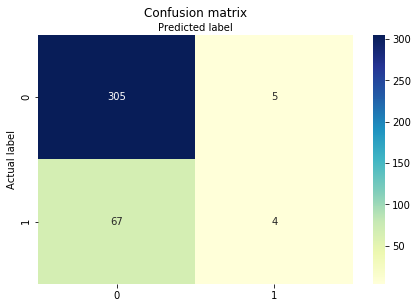

In [33]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_test_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Apply the Random Forest Classifer to determine the optimal number of features for the model**

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Running RFECV
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train_transformed, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [36]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 19


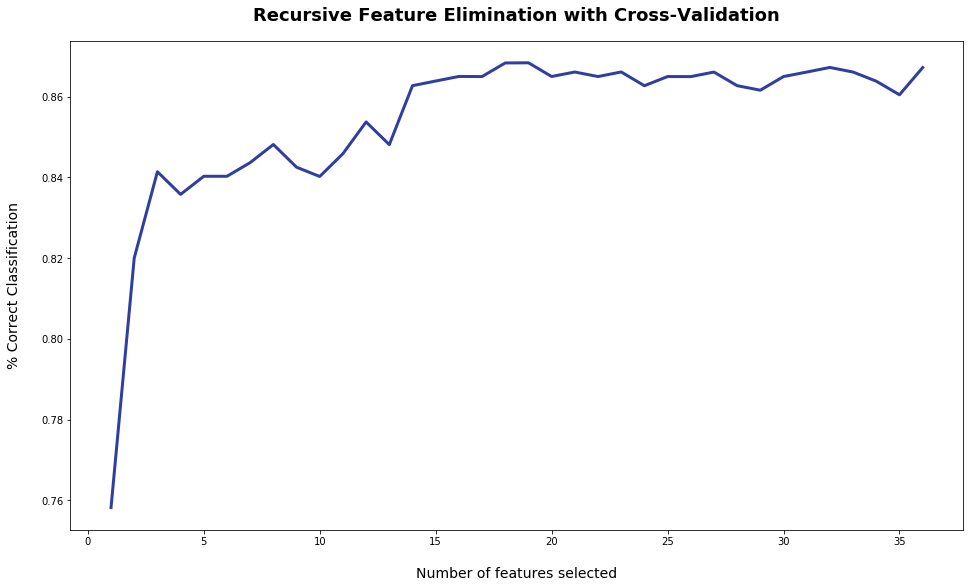

In [37]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [38]:
print(np.where(rfecv.support_ == False)[0])

data.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 0  3  5  6  7  8  9 10 11 14 15 17 19 20 21 22 23]


NameError: name 'X' is not defined

In [ ]:
rfecv.estimator_.feature_importances_

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=10),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train_transformed, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

In [ ]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')